In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
from traps import *

In [2]:
def trajectories(tot_time):

    steps = int(tot_time/0.00005)
    times = np.linspace(0, tot_time, steps)
    positions_LG = np.zeros(steps)
    positions_harm = np.zeros(steps)

    atoms_LG = Atoms_LG(1,  0, 0.1, 25, 6*10**-3, 0, 1, 0)
    atoms_harm = Atoms_harm(1,  0, 0.1, 25, 6*10**-3, 0, 1, 0)

    for j in range(int(tot_time/0.00005)):
        positions_LG[j] = atoms_LG.x_positions[0]
        positions_harm[j] = atoms_harm.x_positions[0]
        atoms_LG.step(0.00005)
        atoms_harm.step(0.00005)
   
    oscillations_LG = np.fft.fft(positions_LG)
    oscillations_harm = np.fft.fft(positions_harm)

    return positions_LG, positions_harm

In [5]:
def kinetic(tot_time, freq):

    steps = int(tot_time/0.00005)
    times = np.linspace(0, tot_time, steps)
    kin_energies_LG = np.zeros(steps)
    kin_energies_harm = np.zeros(steps)

    atoms_LG = Atoms_LG(100,  10, 12, 0, 6*10**-3, freq, 15, 0)
    atoms_harm = Atoms_harm(100,  10, 12, 0, 6*10**-3, freq, 15, 0)

    for j in range(int(tot_time/0.00005)):
        kin_energies_LG[j] = np.sum(atoms_LG.velocities**2)/100
        kin_energies_harm[j] = np.sum(atoms_harm.velocities**2)/100
        atoms_LG.step(0.00005)
        atoms_harm.step(0.00005)

    return kin_energies_LG, kin_energies_harm

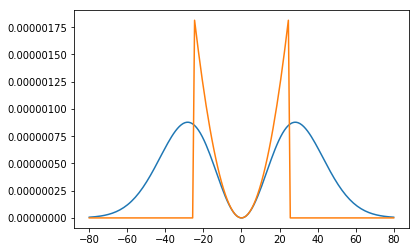

In [6]:
w = 40
P = 6*10**-3
X = np.linspace(-80, 80, 160)
plt.plot(X, LG(X, w, P))
plt.plot(X, harm(X, w, P))

In [7]:
frequencies = np.linspace(0., 3, 31)
result_LG = np.zeros(31)
result_harm = np.zeros(31)

for i in range(31):
    
    a = kinetic(10, frequencies[i])
    
    result_LG[i] = np.mean(a[0][-25000:])
    result_harm[i] = np.mean(a[1][-25000:])


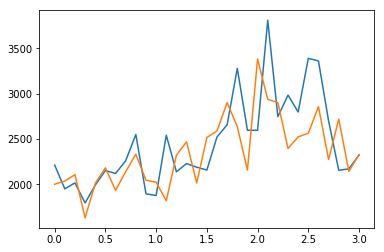

In [9]:
plt.plot(frequencies, result_LG)
plt.plot(frequencies, result_harm)
plt.savefig('kin_energy_fctn_freq.png', format = 'png', dpi = 1000)

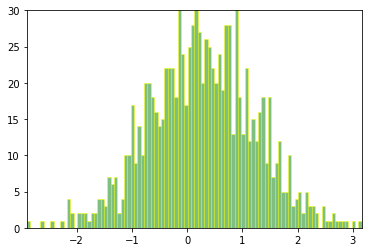

In [13]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation


# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)




nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom



patch = None


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]


fig, ax = plt.subplots()
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
plt.show()

In [19]:
data = np.random.randn(1000)
n, bins = np.histogram(data, 100, range=(-1,1))

In [21]:
n

array([ 6,  2,  4,  3,  4,  6,  6,  8,  7,  5,  5,  5,  4,  7,  7,  3,  4,
        6,  6,  7,  8,  3,  3,  6,  5,  7, 10,  7,  7,  3,  6,  9, 10,  9,
        8,  4, 10, 10,  6,  4, 12,  9, 11,  7,  7, 10,  6, 14, 12, 13,  8,
        4,  7,  4, 10, 14, 13,  7,  6,  5,  6,  8,  6,  9,  5, 11,  3,  7,
       10,  7,  2,  7,  8,  5,  4,  8,  5,  7,  6, 10, 13,  9,  8, 11,  7,
        2,  7, 11,  6,  8,  2,  7,  6,  6, 11,  8,  6,  8,  7,  2])